In [77]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import  seaborn as sns
HOUSING_PATH = os.path.join("../datasets", "housing")

In [78]:
# Loading dataframe
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

df = load_housing_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [79]:
# Counting the number of values in the ocean_proximity column
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [80]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [81]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

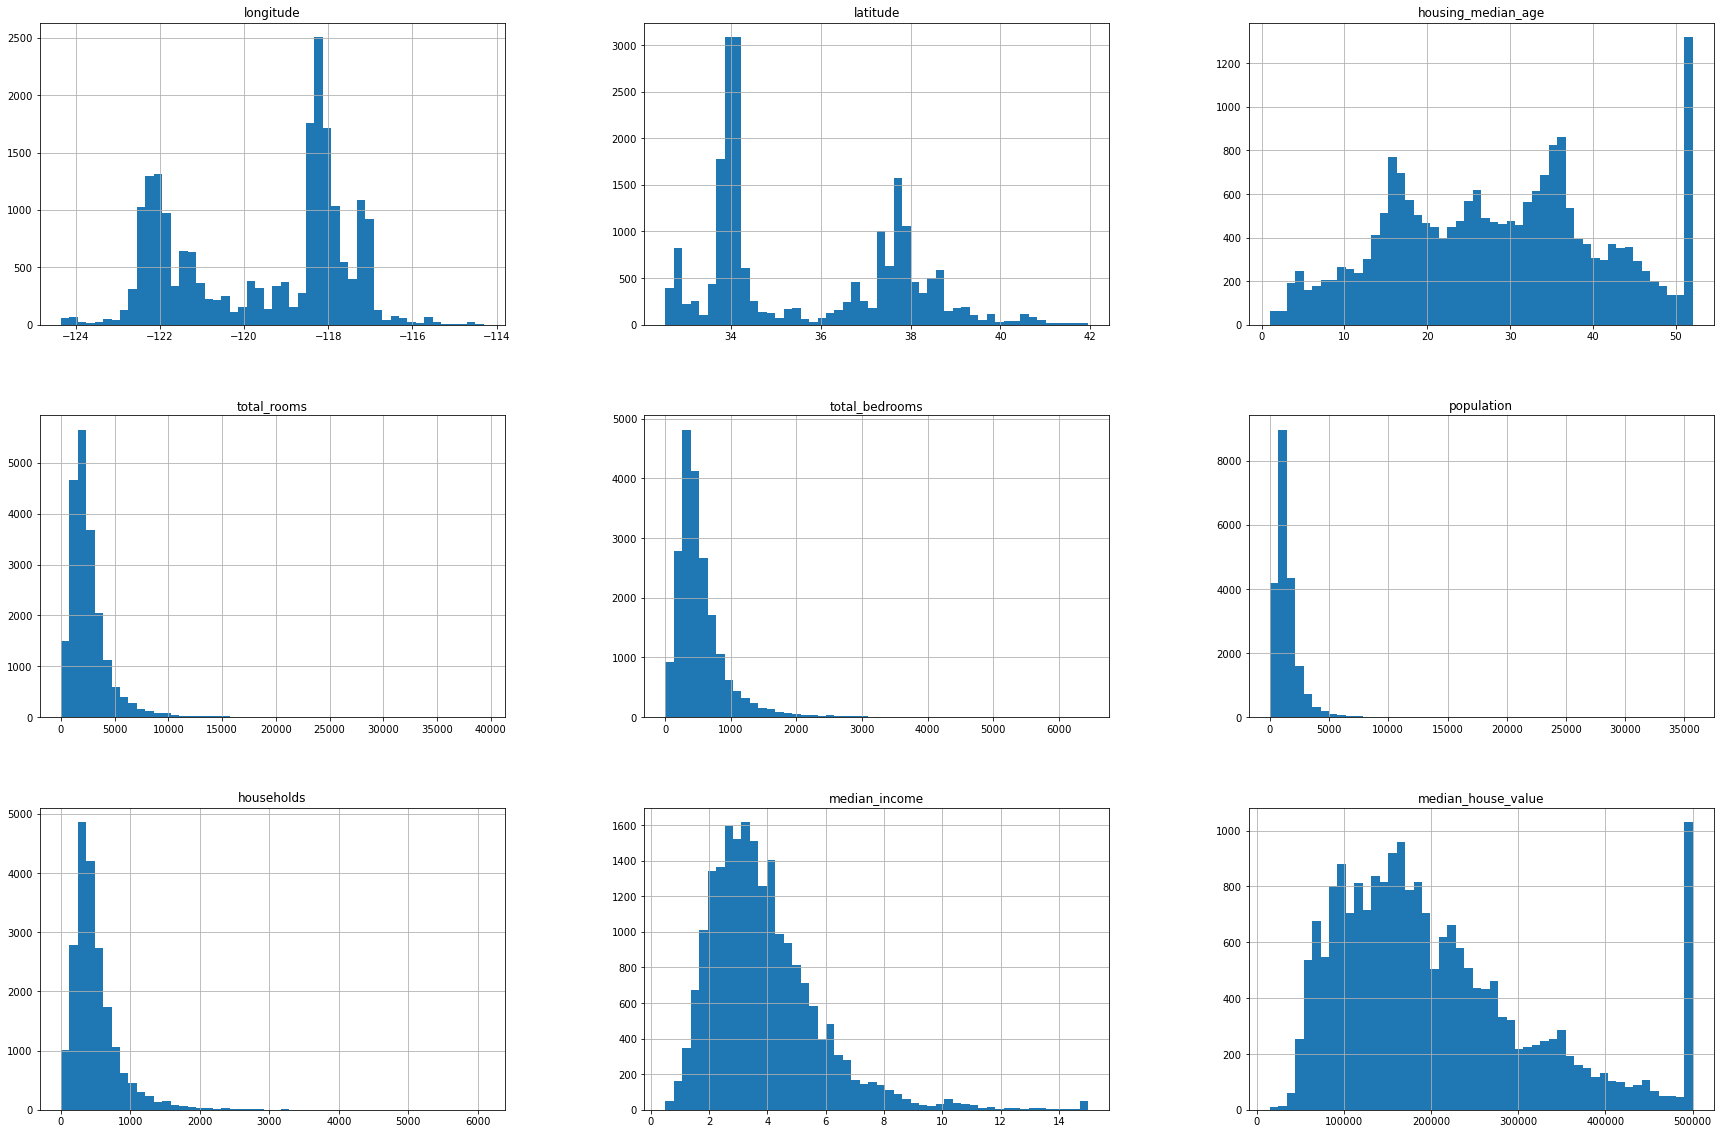

In [82]:
# Building histograms for all features of the dataframe
df.hist(bins=50, figsize=(30,20))

In [83]:
# Standard breakdown of the dataframe into training and test. Good if the dataframe is large
train_set, test_set = train_test_split(df, random_state=42, test_size=0.2)

In [84]:
# Adding a column income_cat, which specifies the category to which the record belongs.
# Category names from labels, values for grouping in the median_income column, category
# boundaries from bins. Since the median_income feature is very important, you need to
# properly break it down into training and test sets. This new column will be used for this.
df["income_cat"] = pd.cut(df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5])

In [85]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split into training and test set, keeping the distribution proportions and values
# in the income_cat column
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [86]:
# Removing the created column as unnecessary

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [87]:
# Copying a dataframe for subsequent operations on a new one
housing = strat_train_set.copy()

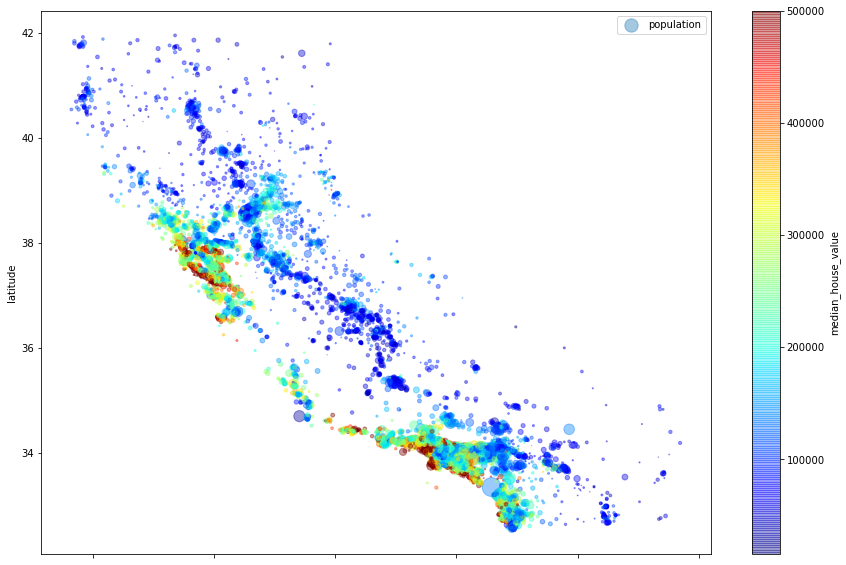

In [88]:
# Building a graph where the geographic coordinates of houses are plotted along the axes
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing["population"]/100, label='population', figsize=(15,10),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_

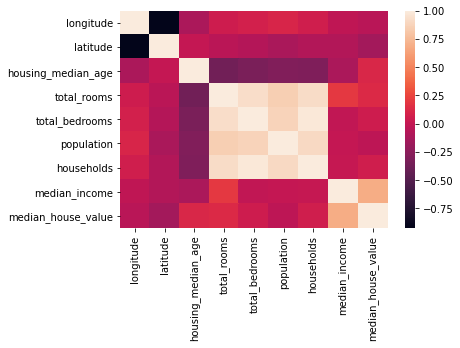

In [89]:
# Creation of a correlation matrix of all features of the dataframe and its graphical display
corr_matrix = housing.corr()
print((corr_matrix))
sns.heatmap(corr_matrix);

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

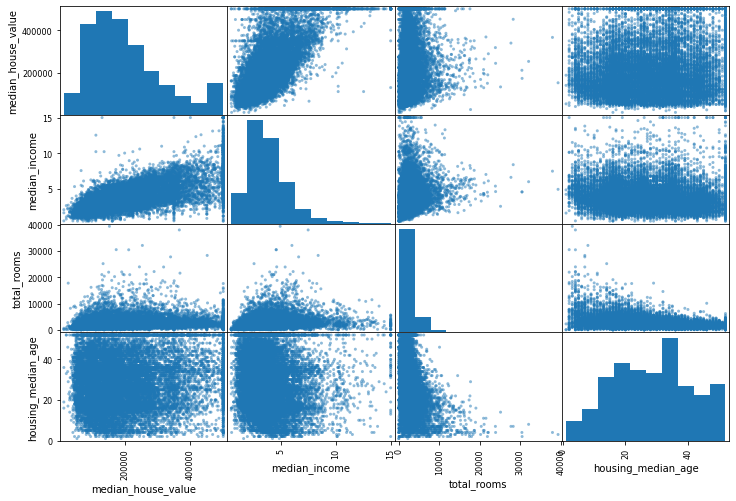

In [90]:
# Building a scatter matrix of all possible combinations of features
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

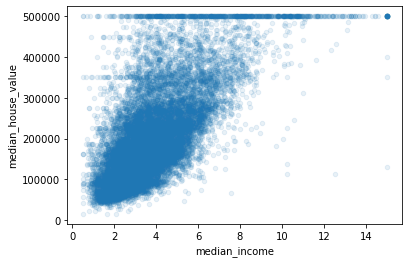

In [91]:
# Plotting a scatter plot for the values "median_income" and "median_house_value"
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [92]:
# Creation of three new features
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

print(housing.corr())

                          longitude  latitude  housing_median_age  \
longitude                  1.000000 -0.924478           -0.105848   
latitude                  -0.924478  1.000000            0.005766   
housing_median_age        -0.105848  0.005766            1.000000   
total_rooms                0.048871 -0.039184           -0.364509   
total_bedrooms             0.076598 -0.072419           -0.325047   
population                 0.108030 -0.115222           -0.298710   
households                 0.063070 -0.077647           -0.306428   
median_income             -0.019583 -0.075205           -0.111360   
median_house_value        -0.047432 -0.142724            0.114110   
rooms_per_household       -0.028345  0.107621           -0.147186   
bedrooms_per_room          0.095603 -0.116884            0.136788   
population_per_household  -0.000410  0.005420            0.015031   

                          total_rooms  total_bedrooms  population  households  \
longitude            

In [93]:
# Removing the median_house_value column from the training dataframe
housing = strat_train_set.drop("median_house_value", axis=1)
# creating pandas series with labels.
housing_labels = strat_train_set["median_house_value"].copy()
housing.isnull().sum()
# Creating a Dataframe without text attributes
housing_num = housing.drop("ocean_proximity", axis=1)

In [94]:
# Replacing NaNs with median values

from sklearn.impute import SimpleImputer # class to take care of missing values

imputer = SimpleImputer(strategy="median")# replace NaN with median value
imputer.fit(housing_num)# fit the imputer instance to the training data
print(imputer.statistics_)
X = imputer.transform(housing_num)# replacing missing values with the learned medians
# X is a NumPy array containing the transformed features Put it back into a pandas DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

# Replacing NaNs with median values only in the column 'total_bedrooms' of the housing DatsFrame
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [96]:
# Replacing category values with numerical

housing_cat = housing[["ocean_proximity"]]

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Each category value gets its own number.
ordinal_encoder=OrdinalEncoder()
# Saving numbers to an array.
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
ordinal_encoder.categories_

# For each category value, a column is created with a value of 1 for that value and 0 for all others
cat_encoder = OneHotEncoder()
# Saving to a sparse matrix. Coulde be transformed to array with .toarray()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()
cat_encoder.categories_

# replace text in column ocean_proximity with numerical values
housing['ocean_proximity']=housing_cat_encoded.astype('int')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,1
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,0
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,1
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,1
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,1
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,0


In [95]:
# Normalization
